## Exercise 1: Basic Complex Number Operations
1. Manually calculate and then verify using Python the result of `(3 + 4j) + (1 - 2j)`, `(5 + 6j) * (7 - 8j)`, and `(2 - 3j) / (1 + 4j)`.
2. Find the conjugate and modulus of `(3 - 4j)`.

In [7]:
a = 3 + 4j
b = 1 - 2j
print("suma complejos")
print(a + b)

a = 5 + 6j
b = 7 - 8j
print("multiplicacion de complejos")
print(a * b)

a = 2 - 3j 
b = 1 + 4j
print("division de complejos")
print(a / b)

a = 3 - 4j
print("conjugado y modulo")
print(a.conjugate())
print(abs(a))

suma complejos
(4+2j)
multiplicacion de complejos
(83+2j)
division de complejos
(-0.5882352941176471-0.6470588235294118j)
conjugado y modulo
(3+4j)
5.0


## Exercise 2: Visualizing Complex Operations
1. Write a Python function to plot a complex number on the complex plane. Use it to plot `(3 + 4j)` and its conjugate.
2. Extend the function to show addition and multiplication of two complex numbers graphically.

In [8]:
import cmath
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def convert_and_plot(real=0, imaginary=0, magnitude=0, angle=0, convert_to='polar'):
    if convert_to == 'polar':
        z = complex(real, imaginary)
        r, theta = cmath.polar(z)
        display_text = f"Cartesian: ({real}, {imaginary}) -> Polar: (r={r:.2f}, θ={np.degrees(theta):.2f}°)"
    else:
        z = cmath.rect(magnitude, np.radians(angle))
        display_text = f"Polar: (r={magnitude}, θ={angle}°) -> Cartesian: ({z.real:.2f}, {z.imag:.2f})"

    fig, ax = plt.subplots()
    ax.plot([0, z.real], [0, z.imag], 'ro-')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(True)
    plt.title(display_text)
    plt.show()

style = {'description_width': 'initial'}
layout = widgets.Layout(width='400px')

# Creating interactive widgets
real_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='Real Part:', style=style, layout=layout)
imaginary_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='Imaginary Part:', style=style, layout=layout)
magnitude_slider = widgets.FloatSlider(min=0, max=5, step=0.1, value=1, description='Magnitude:', style=style, layout=layout)
angle_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=0, description='Angle (degrees):', style=style, layout=layout)
convert_dropdown = widgets.Dropdown(options=['polar', 'cartesian'], value='polar', description='Convert to:', style=style, layout=layout)

# Interactive function

ui = widgets.VBox([widgets.HBox([real_slider, imaginary_slider]), 
                   widgets.HBox([magnitude_slider, angle_slider]),
                   convert_dropdown])
out = widgets.interactive_output(convert_and_plot, {'real': real_slider, 'imaginary': imaginary_slider, 
                                                    'magnitude': magnitude_slider, 'angle': angle_slider, 
                                                    'convert_to': convert_dropdown})

def plot (complex):
    real_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value = complex.real , description='Real Part:', style=style, layout=layout)
    imaginary_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value = complex.imag, description='Imaginary Part:', style=style, layout=layout)
    magnitude_slider = widgets.FloatSlider(min=0, max=5, step=0.1, value=1, description='Magnitude:', style=style, layout=layout)
    angle_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=0, description='Angle (degrees):', style=style, layout=layout)
    convert_dropdown = widgets.Dropdown(options=['polar', 'cartesian'], value='polar', description='Convert to:', style=style, layout=layout)

    ui = widgets.VBox([widgets.HBox([real_slider, imaginary_slider]), 
                   widgets.HBox([magnitude_slider, angle_slider]),
                   convert_dropdown])
    out = widgets.interactive_output(convert_and_plot, {'real': real_slider, 'imaginary': imaginary_slider, 
                                                    'magnitude': magnitude_slider, 'angle': angle_slider, 
                                                    'convert_to': convert_dropdown})
    display(ui, out)
a = 3 + 4j
plot(a)

def plot2 (a, b):
    sum = a + b
    mul = a * b 
    plot(sum)
    plot(mul)
 
a = 3 + 4j
b = 2 - 3j

plot2 (a, b)

Output()

Output()

Output()

## Exercise 3: Exploring the Mandelbrot Set
1. Modify the provided Mandelbrot set code to change its zoom level and center point. Observe how the fractal pattern changes.
2. Experiment with different values of `max_iter` and observe the effect on the fractal's detail and computation time.

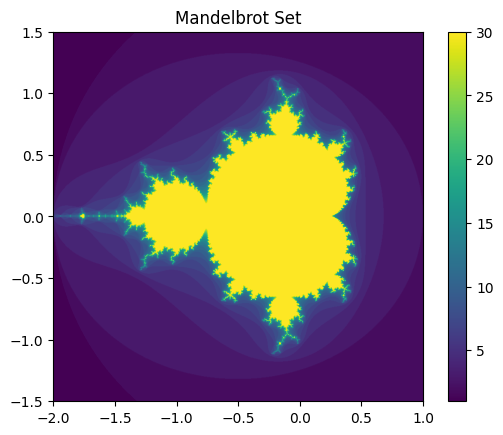

Diferente zoom mismo centro


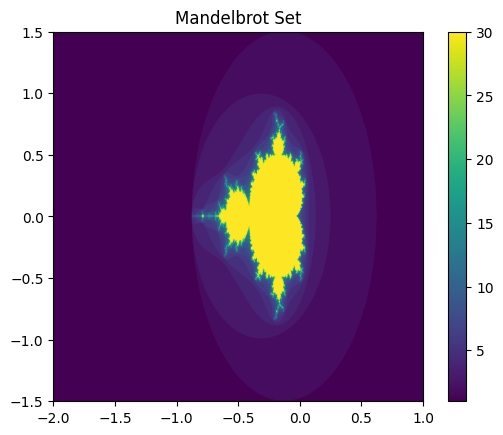

Mismo zoom diferente centro


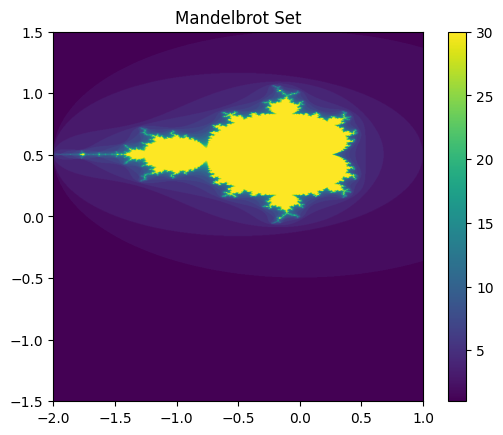

La figura sigue igual pero con un tamaño diferente por el zoom


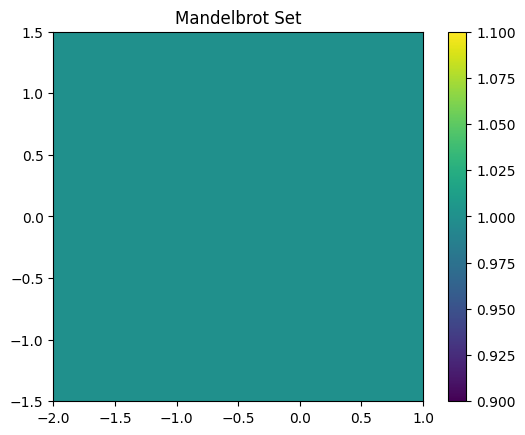

Como vemos las figuras ya no continuan su forma
max iter mas bajo


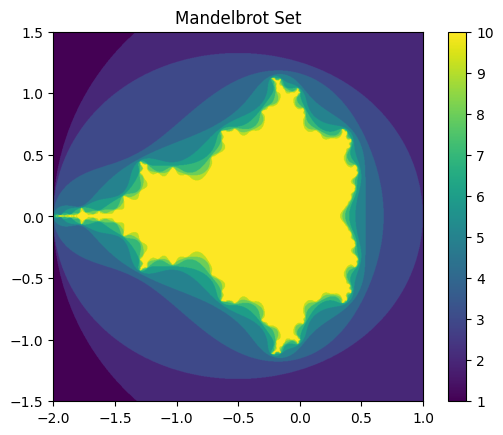

max_iter diferente


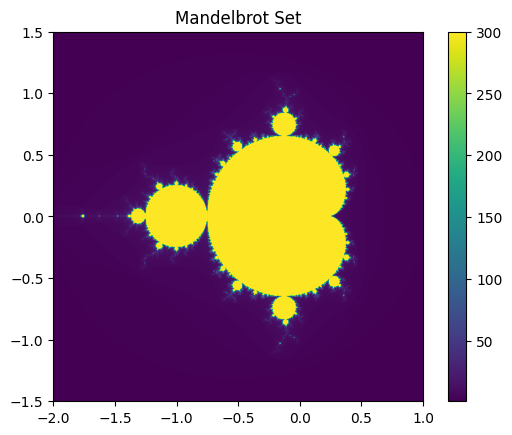

tiempos de las pruebas
tiempo max_iter = 30 1.579838514328003
tiempo max_iter = 100 0.0
tiempo max_iter = 500 9.189436912536621
a mayor max_iter mayor el tiempo
a mayor tiempo mas nitidez


In [9]:
import time

import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Create a grid of complex numbers
time_inicial_30 = time.time()
pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j
# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()
time_final_30 = time.time()

print("Diferente zoom mismo centro")
pixels = 800
max_iter = 30
x = np.linspace(-5, 3, pixels)
y = np.linspace(-2, 2, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()

print("Mismo zoom diferente centro")
pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-2, 4, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()

print("La figura sigue igual pero con un tamaño diferente por el zoom")

pixels = 800
max_iter = 30
x = np.linspace(-5, -3, pixels)
y = np.linspace(-3, -1.5, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()
print("Como vemos las figuras ya no continuan su forma")

print("max iter mas bajo")

time_inicial_500 = time.time()
pixels = 800
max_iter = 10
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()
time_final_10 = time.time()

print("max_iter diferente")
# Create a grid of complex numbers
time_inicial_100 = time.time()
pixels = 800
max_iter = 300
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
c = xx + yy*1j

# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()

time_final_300= time.time()
print("tiempos de las pruebas")
print("tiempo max_iter = 30" , time_final_30 - time_inicial_30)
print("tiempo max_iter = 100" , time_final_10 - time_inicial_100)
print("tiempo max_iter = 500" , time_final_300 - time_inicial_500)
print("a mayor max_iter mayor el tiempo")
print("a mayor tiempo mas nitidez")

## Exercise 4: Creating a Julia Set
1. Implement a Julia set generator. Use a constant like `-0.4 + 0.6j` for the iteration `z = z*z + constant`.
2. Explore how changing the constant changes the pattern of the Julia set.

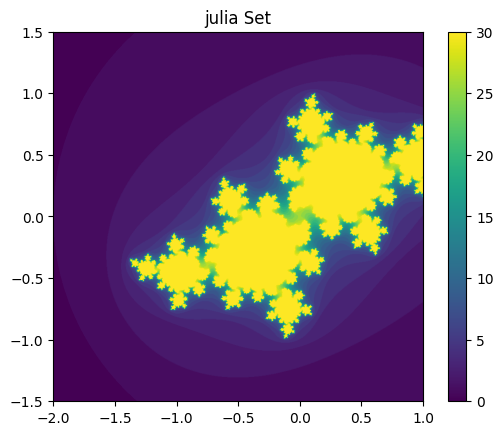

la inversa en la constante + 1


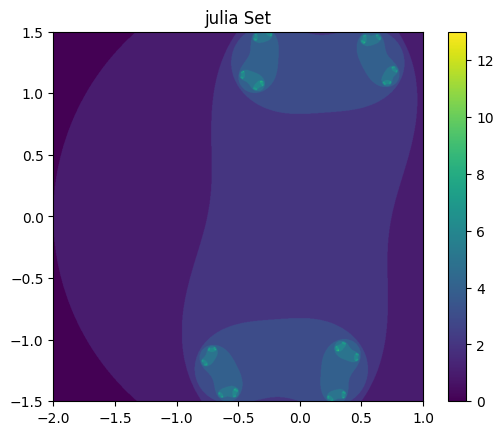

la figura se desvanece
sin la inversa en la constante + 1


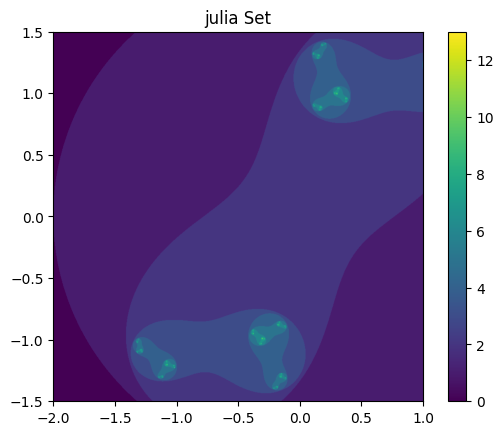

la figura desaparece


In [11]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot(z, c, max_iter):

    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Create a grid of complex numbers

pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
z = xx + yy*1j
c = -0.4 + 0.6j
# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(zi,c, max_iter) for zi in z.ravel()]).reshape(z.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("julia Set")
plt.show()
print("la inversa en la constante + 1")
pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
z = xx + yy*1j
c = 1.4 + 0.4j
# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(zi,c, max_iter) for zi in z.ravel()]).reshape(z.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("julia Set")
plt.show()

print("la figura se desvanece")
print("sin la inversa en la constante + 1")
pixels = 800
max_iter = 30
x = np.linspace(-2, 1, pixels)
y = np.linspace(-1.5, 1.5, pixels)
xx, yy = np.meshgrid(x, y)
z = xx + yy*1j
c = 0.6 + 1.6j
# Compute Mandelbrot set
mandelbrot_set = np.array([mandelbrot(zi,c, max_iter) for zi in z.ravel()]).reshape(z.shape)

# Plot
plt.imshow(mandelbrot_set, extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title("julia Set")
plt.show()

print("la figura desaparece")

## Exercise 5: Complex Number Properties
1. Prove that the absolute value of a product of two complex numbers is the product of their absolute values.
2. Show that the conjugate of a sum of two complex numbers is the sum of their conjugates.

In [16]:
print("1")
a = 2 + 5.6j
b = 3 - 1.9j
def producto_com(a,b):
    producto = a*b
    return abs(producto)
def producto_abs(a,b):
    a = abs(a)
    b = abs(b)
    return a*b
print(producto_abs(a,b), producto_com(a,b))
if producto_abs(a,b) == producto_com(a,b):
    print("se cumple")
else:
    print("no se cu,ple" )

a = 1 - 6j
b = 1 -2j
print(producto_abs(a,b), producto_com(a,b))
if producto_abs(a,b) == producto_com(a,b):
    print("se cumple")
else:
    print("no se cu,ple" )

print("2")
def sum_conjugada(a,b):
    sum = a+b
    return sum.conjugate()
def sum_conjugados(a,b):
    a = a.conjugate()
    b = b.conjugate()
    return a+b

a = 2 + 5.6j
b = 3 - 0.9j
print(sum_conjugada(a,b), sum_conjugados(a,b))
if sum_conjugada(a,b) == sum_conjugados(a,b):
    print("se cumple")
else:
    print("no se cu,ple" )
a = 1 - 6j
b = 1 -2j
print(sum_conjugada(a,b), sum_conjugados(a,b))
if sum_conjugada(a,b) == sum_conjugados(a,b):
    print("se cumple")
else:
    print("no se cu,ple" )

1
21.11609812441683 21.11609812441683
se cumple
13.601470508735444 13.601470508735444
se cumple
2
(5-4.699999999999999j) (5-4.699999999999999j)
se cumple
(2+8j) (2+8j)
se cumple
